In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9928\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the RobustScaler Autoencoder dataset

In [7]:
minmaxPCA=pd.read_csv('Autoencoder_RobustScaler_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,0.0,0.0495
1,1,0.0,0.0726
2,2,0.0,0.0859
3,3,0.0,0.0783
4,4,0.0,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,0.0,0.0495
1,0.0,0.0726
2,0.0,0.0859
3,0.0,0.0783
4,0.0,0.0767
...,...,...
1551,0.0,393.7880
1552,0.0,386.2650
1553,0.0,379.4510
1554,0.0,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

### Accuracy on linear regression

In [13]:
train_score = regressor.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = regressor.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 0.03681321805888427
Test score of trained model: -1.3525807357539277


In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [15]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,50894.125414
1,RMSE,225.597264
2,MAE,181.884160
3,MAPE,23853.767360
4,r2,-0.013526
5,adj_r2,-0.016795


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 0.03681318131916189
Test score of trained model: -1.3525654212569238


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [17]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,50894.117723
1,RMSE,225.597247
2,MAE,181.884373
3,r2,-0.013526
4,adj_r2,-0.016795


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 0.03681127550443364
Test score of trained model: -1.3524727314211393


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,50894.071179
1,RMSE,225.597144
2,MAE,181.885706
3,r2,-0.013525
4,adj_r2,-0.016794


### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
pred=grid_GBR.predict(X_test)
train_score = grid_GBR.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = grid_GBR.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 0.026290270686013528
Test score of trained model: -1.8790823159394954


In [23]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,51158.507803
1,RMSE,226.182466
2,MAE,184.628351
3,r2,-0.018791
4,adj_r2,-0.022077


In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=10, n_estimators=1000,
                          subsample=0.1)

 The best score across ALL searched params:
 -0.0023024106271190004

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.1}


### Training the Random forest regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [26]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    k = X_test.shape[1]
    n = len(X_test)

    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

    results = [MSE, RMSE, MAE, r2, adj_r2]
    metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

    table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
    print(table_results)
    return y_test,y_predict

In [27]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: -0.015398271871882363
   Metric         Score
0     MSE  50988.151084
1    RMSE    225.805560
2     MAE    182.924262
3      r2     -0.015398
4  adj_r2     -0.018674
Best Score: -0.010197501442558422
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: -0.013480157297731443
   Metric         Score
0     MSE  50891.833099
1    RMSE    225.592183
2     MAE    181.881294
3      r2     -0.013480
4  adj_r2     -0.016749
Best Score: -0.009354946112885232
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 20}
Loop:  2
--------------
R2 score: -0.013754678821394029
   Metric         Score
0     MSE  50905.618178
1    RMSE    225.622734
2     MAE    182.040262
3      r2     -0.013755
4  adj_r2     -0.017025
Best Score: -0.009403630887380254
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 10}
Loop:  3
--------------
R2 score: -0.01532359324398147
   Metric         Score
0     MSE  50984.401102
1    RMSE    225.797257
2     MAE    182.891270
3      r2     -0.015324
4  adj_r2     -0.018599
Best Score: -0.009658575685077197
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 20}
Loop:  4
-----------

C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 170.0343 - mean_absolute_error: 165.5777 - val_loss: 129.3652 - val_mean_absolute_error: 128.0933
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.9492 - mean_absolute_error: 165.4898 - val_loss: 128.0658 - val_mean_absolute_error: 127.9779
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 165.3403 - mean_absolute_error: 165.2939 - val_loss: 127.6937 - val_mean_absolute_error: 127.6562
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 163.8664 - mean_absolute_error: 163.5813 - val_loss: 124.7550 - val_mean_absolute_error: 123.9911
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 161.9563 - mean_absolute_error: 161.2439 - val_loss: 124.5994 - val_mean_absolute_error: 123.9563
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 161.7658 - mean_absolute_error: 161.1785 - val_loss: 124.4820 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2252 - mean_absolute_error: 161.1290 - val_loss: 124.1326 - val_mean_absolute_error: 124.0347
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2368 - mean_absolute_error: 161.1461 - val_loss: 124.0402 - val_mean_absolute_error: 123.9628
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 161.2220 - mean_absolute_error: 161.1424 - val_loss: 124.0408 - val_mean_absolute_error: 123.9636
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2463 - mean_absolute_error: 161.1453 - val_loss: 124.0601 - val_mean_absolute_error: 123.9765
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2388 - mean_absolute_error: 161.1625 - val_loss: 124.0798 - val_mean_absolute_error: 123.9958
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 161.2237 - mean_absolute_error: 161.1460 - val_loss: 124.0535 - va

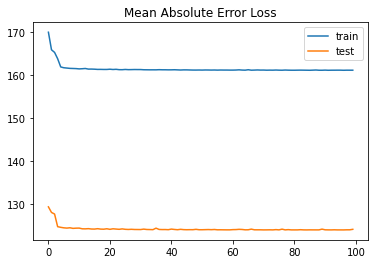

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 170.1165 - mean_absolute_error: 165.5759 - val_loss: 129.3812 - val_mean_absolute_error: 128.0842
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.9182 - mean_absolute_error: 165.4554 - val_loss: 127.9993 - val_mean_absolute_error: 127.9152
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 165.2549 - mean_absolute_error: 165.2061 - val_loss: 127.6100 - val_mean_absolute_error: 127.5622
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 164.6404 - mean_absolute_error: 164.5677 - val_loss: 126.6118 - val_mean_absolute_error: 126.4951
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 162.6250 - mean_absolute_error: 162.2739 - val_loss: 124.4336 - val_mean_absolute_error: 123.9568
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 161.6752 - mean_absolute_error: 161.2572 - val_loss: 124.3976 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 161.3368 - mean_absolute_error: 161.1410 - val_loss: 124.1581 - val_mean_absolute_error: 123.9660
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 161.3551 - mean_absolute_error: 161.1523 - val_loss: 124.2113 - val_mean_absolute_error: 124.0024
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 161.3471 - mean_absolute_error: 161.1446 - val_loss: 124.1655 - val_mean_absolute_error: 123.9630
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 161.3474 - mean_absolute_error: 161.1530 - val_loss: 124.1727 - val_mean_absolute_error: 123.9701
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 161.3765 - mean_absolute_error: 161.1534 - val_loss: 124.1866 - val_mean_absolute_error: 123.9592
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 161.3474 - mean_absolute_error: 161.1509 - val_loss: 124.1612 - va

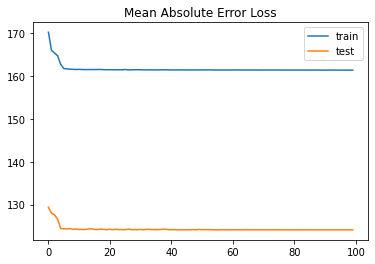

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 19.8485 - mse: 94895.2109 - val_loss: 14.7178 - val_mse: 65642.4688
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 15.7707 - mse: 94895.2031 - val_loss: 13.5211 - val_mse: 65642.4688
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3528 - mse: 94895.2266 - val_loss: 13.4639 - val_mse: 65642.4688
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3371 - mse: 94895.2109 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3370 - mse: 94895.2188 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 15.3369 - mse: 94895.2031 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3370 - mse: 94895.1953 - val_loss: 13.4627 - val_mse: 65642.4688
Epoch 8/100
6

Epoch 59/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3370 - mse: 94895.2188 - val_loss: 13.4625 - val_mse: 65642.4688
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2109 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1953 - val_loss: 13.4628 - val_mse: 65642.4688
Epoch 62/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2266 - val_loss: 13.4633 - val_mse: 65642.4688
Epoch 63/100
63/63 [==============================] - 0s 3ms/step - loss: 15.3370 - mse: 94895.2109 - val_loss: 13.4627 - val_mse: 65642.4688
Epoch 64/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.1953 - val_loss: 13.4631 - val_mse: 65642.4688
Epoch 65/100
63/63 [==============================] - 0s 2ms/step - loss: 15.3369 - mse: 94895.2188 - val_loss: 13.4633 - val_mse: 65642.4688
Epoch 

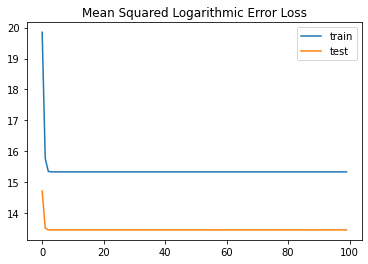

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 94881.0469 - mse: 94877.9375 - val_loss: 65611.3047 - val_mse: 65611.0547
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 94816.9219 - mse: 94816.8281 - val_loss: 65544.8672 - val_mse: 65544.8281
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 94708.8359 - mse: 94708.7891 - val_loss: 65442.8750 - val_mse: 65442.8594
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 94557.5703 - mse: 94557.5547 - val_loss: 65310.0312 - val_mse: 65310.0078
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 94362.8047 - mse: 94362.7812 - val_loss: 65144.2930 - val_mse: 65144.2500
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 94126.1094 - mse: 94126.0703 - val_loss: 64947.2227 - val_mse: 64947.2031
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 93859.5234 - mse: 93859.4922 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 71285.2969 - mse: 71285.2578 - val_loss: 49751.7617 - val_mse: 49751.7305
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 71020.1953 - mse: 71020.1719 - val_loss: 49660.0391 - val_mse: 49660.0156
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 70774.1484 - mse: 70774.1172 - val_loss: 49577.5273 - val_mse: 49577.4961
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 70535.6797 - mse: 70535.6562 - val_loss: 49500.5430 - val_mse: 49500.5078
Epoch 60/100
100/100 [==============================] - 0s 3ms/step - loss: 70313.7891 - mse: 70313.7500 - val_loss: 49438.1484 - val_mse: 49438.1211
Epoch 61/100
100/100 [==============================] - 0s 3ms/step - loss: 70105.6641 - mse: 70105.6250 - val_loss: 49383.1328 - val_mse: 49383.1094
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 69910.3984 - mse: 69910.

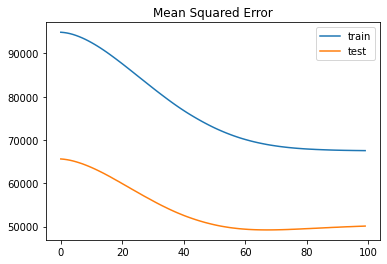

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()